In [1]:
import h5py, os, sys
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import EstimatorV2
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
from qiskit.quantum_info import SparsePauliOp 
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit_aer import AerSimulator
from qiskit.primitives.containers.estimator_pub import EstimatorPub
from qiskit.primitives.containers.observables_array import ObservablesArray
from qiskit_ibm_transpiler.transpiler_service import TranspilerService
from qiskit_device_benchmarking.utilities.gate_map import plot_gate_map


import pickle
import json
import numpy as np
from decimal import *
import math
import copy

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Batch


from mps_functions_hardware import * 

c:\Users\tuccia\Documents\CQTA\FGA\Qubo\New_folder\yahui_branch\mps_functions_hardware.py:1023: SyntaxWarning: invalid escape sequence '\P'
  """Get the approximated warm start parameters for a two-qubit term without measurements,


In [2]:
import numpy as np
import networkx as nx
from scipy.optimize import minimize
#import matplotlib.pyplot as plt

import argparse
import os
import sys
import pickle

import neal  # Simulated Annealing Sampler
from collections import OrderedDict

import itertools
import time
import pickle

sys.path.insert(0, '../')  #nel codice e' sys.path.insert(0, '../../') perche' sono due cartelle

SIMULATED COMPUTATION

<!-- N = 40

# apply circuit to qiskit QC, and print to check structure correct
N=40
qc = QuantumCircuit(N)

# init state up to t=11.0
for i in range(len(ansatz)):
    qc.unitary(ansatz[i].T, (ansatz_inds[i][0], ansatz_inds[i][1]))

# have set this to repeat 4 times -> 4 evolutions of dt=2.0 takes state up to t=19.0
for _ in range(t_step):
    for i in range(len(ansatz_evol)):
        for j in range(len(ansatz_evol[i])):
            qc.unitary(ansatz_evol[i][j].T, (ansatz_inds_evol[i][j][0], ansatz_inds_evol[i][j][1])) -->

In [3]:
N = 40
n_qubits = N
num_variables = str(N).zfill(3)
graph = '3regular'
graph_type = graph
r = 14
alpha = 0.001
layer = 1

num_params= int(2*(3*N)/2 + N)
if_adsorting = True
if_analytic = 1

tau = 0.3
bond = 100

#region load qubo instances, get Hamiltonian and edge_coeff_dict
instance_dir = '../instances/'+ graph + '/N_' + str(N)
with open(instance_dir + '/QUBO_' + str(N ) + 'V_'+ 'r_'+ str(r)+ '.gpickle', 'rb') as f:
    G = pickle.load(f)
coeff_list = np.loadtxt(instance_dir + '/QUBO_coeff_' + str(N) + 'V_'+ 'r_'+ str(r)+ '.txt')
h_list = coeff_list[:N ]
J_list = coeff_list[N :]

# dir_0 = './data_iter_adap_sorting_analytic_mps' + '/graph_{}/shots_{}'\
#         .format(graph,  shots) 

# dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
#             .format(num_variables, num_params, layer, alpha)

# file_dir_name = dir_name + '/r_{}'\
#             .format(r)

# filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
#                                         .format(if_adsorting,tau,bond)
# with open(filename, 'rb') as f:
#     data = pickle.load(f)

In [4]:
shots = 100000
backend_method = 'matrix_product_state'
hardware_backend=None
layout=None

if if_adsorting == 0:
    if_adsorting = False
else:
    if_adsorting = True
    invert = True

print("\n\n#############################################################################")

print("\nn_qubits:            ", n_qubits)
print("r:                   ", r)
print("alpha:               ", alpha)
print("tau:                 ", tau)
print("layer:               ", layer)

print("backend_method:      ", backend_method)
print("bond:                ", bond)
print("shots:               ", shots)

print("graph_density:       ", graph_type)
print("if_adsorting:        ", if_adsorting)
print("if_analytic:         ", if_analytic)

#endregion



#make data dir
if if_analytic == 1:
    dir_0 = './data_iter_adap_sorting_analytic_mps_hardware/'
    
else:
    dir_0 = './data_iter_adap_sorting_nomeasure_mps_hardware/'
    

os.makedirs(dir_0, exist_ok=True)

#region load qubo instances, get Hamiltonian and edge_coeff_dict
instance_dir = '../instances/'+ graph_type + '/N_' + str(n_qubits )
with open(instance_dir + '/QUBO_' + str(n_qubits ) + 'V_'+ 'r_'+ str(r)+ '.gpickle', 'rb') as f:
    G = pickle.load(f)
coeff_list = np.loadtxt(instance_dir + '/QUBO_coeff_' + str(n_qubits) + 'V_'+ 'r_'+ str(r)+ '.txt')
# edge_list = list(G.edges) #THIS IS DIFFERENT FROM YHAUI!!
edge_list = list(itertools.chain.from_iterable(partition_graph(G)))

print('\n\n#############################################################################')
h_list = coeff_list[:n_qubits ]
J_list = coeff_list[n_qubits : n_qubits + len(edge_list)]

#get the exact solution
if n_qubits <= 2:
    print('\n\nstart brute force')
    eigen_idvalue_dict = brute_force(n_qubits, edge_list, h_list, J_list)
    #print('eigen_idvalue_dict', list(eigen_idvalue_dict.items())[:10])
else:
    print('\n\nstart simulated annealing')
    # eigen_idvalue_dict = simulated_annealing(n_qubits, edge_list, h_list, J_list)
    eigen_idvalue_dict = simulated_annealing(n_qubits, edge_list, h_list, J_list)
    # print('eigen_idvalue_dict', eigen_idvalue_dict)




#############################################################################

n_qubits:             40
r:                    14
alpha:                0.001
tau:                  0.3
layer:                1
backend_method:       matrix_product_state
bond:                 100
shots:                100000
graph_density:        3regular
if_adsorting:         True
if_analytic:          1


#############################################################################


start simulated annealing

time for simulated annealing:  36.95943212509155
Rank 1: Bitstring=1111101110101101100010100110001101010101, Decimal=1080948319061, Energy=-34.0158
Rank 2: Bitstring=1111101100101101100010100110001101010101, Decimal=1078800835413, Energy=-34.0084
Rank 3: Bitstring=0111101110101111100010100110001101010101, Decimal=531226059605, Energy=-33.9626
Rank 4: Bitstring=0111101100101111100010100110001101010101, Decimal=529078575957, Energy=-33.9552
Rank 5: Bitstring=1111101110101101110110100110001101000101,

In [5]:
# Initialize dictionary for single Pauli Z term with coefficient from h_list
edge_coeff_dict = {}
edge_coeff_dict.update({(i,): h_val for i, h_val in enumerate(h_list)})
edge_coeff_dict.update({edge: J_val for edge, J_val in zip(edge_list, J_list)}) #CHANGED COMPARED TO THE OLD CODE
# print('edge_coeff_dict', edge_coeff_dict.items())

#endregion


if backend_method == 'matrix_product_state':
    backendoptions = {'method':backend_method, 'matrix_product_state_max_bond_dimension': bond, 'shots': shots}
else:
    backendoptions = {'method':backend_method, 'shots': shots}

#region get best sorting way from cvar value
print("\n\n##start random order circuit")
t1 = time.time()
expz_array = np.array([0]*n_qubits)

edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
n_qubits, tau, layer, expz_array, edge_coeff_dict, edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic, hardware_backend, layout)     
cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)
t2 = time.time()

print("time to run whole circuit: ", t2-t1)
print('cvar of random order: ', cvar)
# print("\nparams_init: ", params_init)
print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
print('expz_array: ', expz_array)

############################################################
best_cvar = cvar 
sorting = False
best_abs = False
best_inv = False

print("\n\n##start adaptive sorting")
if if_adsorting:
    for Abs in [True, False]:
        for invert in [True, False]:

            expz_array = np.array([0]*n_qubits)
            sorted_edge_list, edges_columns = sorted_gates(J_list, edge_list, Abs, invert)

            edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
            n_qubits, tau, layer, expz_array, edge_coeff_dict, sorted_edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic, hardware_backend, layout)     #HO SPOSTATO IL SALVADATI A DOPO
            cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)

            print(f'\nAbs:{Abs}, invert:{invert}, cvar: {cvar}')
            # print("\nparams_init: ", params_init)
            print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
            # print('expz_array: ', expz_array)


            if cvar < best_cvar:
                best_cvar = cvar
                sorting = True
                best_abs = Abs
                best_inv = invert
        
#endregion


#region iterate and save data
print('\n\n#############################################################################')
print('start iterate')
if sorting:
    edge_list, edges_columns = sorted_gates(J_list, edge_list, best_abs, best_inv)
    print('\nchanged: ', sorting, best_abs, best_inv)

expz_array = np.array([0]*n_qubits)
steps_edge_params_dict = {}
steps_exp_poss_dict = {}
steps_cvar_dict = {}
for step in range(10):

    # circ_init = initial_state_ry(n_qubits, expz_array)
    edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
    n_qubits, tau, layer, expz_array, edge_coeff_dict, edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic,hardware_backend, layout)     #HO SPOSTATO IL SALVADATI A DOPO
    cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)
    #entropy = entanglement_entropy(state_all , range(round(n_qubits/2)), [2]*n_qubits, tol=1e-12)[0]

    steps_edge_params_dict['step_'+str(step)] = edge_params_dict
    steps_exp_poss_dict['step_'+str(step)] = list(exp_poss_dict['l_1'].items())[:100]
    steps_cvar_dict['step_'+str(step)] = cvar
    print('\nstep: ', step)
    print(f"cvar: {cvar:.6f}")
    # print("\nparams_init: ", params_init)
    print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
    print(f"expz_array: {expz_array}")
    
num_params = len(params_init)   

dir_name =  dir_0 + '/graph_{}/shots_{}/num_variables_{:03d}/params_{}_layer_{}/alpha_{}/r_{}/'\
    .format(graph_type,  shots, n_qubits, num_params, layer, alpha, r)
os.makedirs(dir_name, exist_ok=True)
    
gi_file_path = dir_name + 'ifadsorting_{}_tau_{}_bond_{}.pkl'.format(if_adsorting, tau, bond)

save_data = {
            'eigen_idvalue_dict': eigen_idvalue_dict,  ## from brute force or simulated annealing
            'edge_order': edge_list,
            'steps_edge_params_dict': steps_edge_params_dict,
            'steps_exp_poss_dict': steps_exp_poss_dict,
            'steps_cvar_dict': steps_cvar_dict,
            'sorting' : sorting,
            'abs' : best_abs,
            'invert' : best_inv
                }

with open(gi_file_path, 'wb') as f:
    pickle.dump(save_data, f)

print('Write sucessfully to ' + dir_name)



##start random order circuit
backend: matrix_product_state
time to run whole circuit:  288.13318037986755
cvar of random order:  -31.129421999999924
(exp, poss): [(-34.0158, 0), (-34.0084, 0), (-33.9626, 1e-05), (-33.9552, 0), (-33.5154, 0)]
expz_array:  [-0.96  1.   -0.92  0.56 -0.44  0.54 -0.46  1.    0.02 -0.96  0.88  0.76
  0.02 -0.38 -0.98  1.    1.   -0.48  0.92 -0.2   0.16  0.98 -0.06 -0.46
 -0.62 -0.36 -0.94 -1.    0.64 -1.    0.94  0.2  -0.8  -0.94  0.42 -0.88
 -0.94 -0.98 -1.   -0.24]


##start adaptive sorting
backend: matrix_product_state

Abs:True, invert:True, cvar: -31.17993399999994
(exp, poss): [(-34.0158, 0), (-34.0084, 0), (-33.9626, 0), (-33.9552, 0), (-33.5154, 0)]
backend: matrix_product_state

Abs:True, invert:False, cvar: -31.107191999999948
(exp, poss): [(-34.0158, 0), (-34.0084, 0), (-33.9626, 0), (-33.9552, 0), (-33.5154, 0)]
backend: matrix_product_state

Abs:False, invert:True, cvar: -31.094233999999947
(exp, poss): [(-34.0158, 0), (-34.0084, 1e-05), (-33

This is what we need to reproduce

# Load MPS ansatz

In [5]:
dir_0 = './data_iter_adap_sorting_analytic_mps_hardware' + '/graph_{}/shots_{}'\
        .format(graph,  shots) 

dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
            .format(num_variables, num_params, layer, alpha)

file_dir_name = dir_name + '/r_{}'\
            .format(r)

filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                        .format(if_adsorting,tau,bond)
with open(filename, 'rb') as f:
    data = pickle.load(f)

print(data.keys())
print(data['edge_order'][0])
print(data['steps_edge_params_dict']['step_0']['l_1'])

pairs_all = data['edge_order'][0]
edge_params_dict = data['steps_edge_params_dict']['step_0']['l_1']
edge_params_dict[(0,)]

dict_keys(['eigen_idvalue_dict', 'edge_order', 'steps_edge_params_dict', 'steps_exp_poss_dict', 'steps_cvar_dict', 'sorting', 'abs', 'invert'])
(np.int64(21), np.int64(39))
{(0,): 0.19275137338956203, (1,): -0.5242733090981705, (2,): 0.13740823215822748, (3,): 0.3713677253429855, (4,): 0.37388219207450973, (5,): -0.013679981232728237, (6,): -0.3428147901302822, (7,): -0.533747757027767, (8,): -0.4149736089143403, (9,): 0.2482239720188095, (10,): -0.5626115284803642, (11,): 0.06435015427346716, (12,): -0.2125143838403231, (13,): 0.5605813800271083, (14,): 0.5607337867124172, (15,): -0.40446409523723226, (16,): 0.021958947282806004, (17,): 0.11102644904113465, (18,): -0.05847753716433199, (19,): -0.48877122617627217, (20,): -0.01025998592411335, (21,): -0.5231827003640694, (22,): 0.36571536362661805, (23,): 0.10062552186965254, (24,): 0.4146442099335522, (25,): 0.38913809124593474, (26,): 0.22508864668147247, (27,): 0.5084708394935076, (28,): -0.48150223532945546, (29,): 0.50868040056084

0.19275137338956203

In [6]:
file_dir_name = './data_iter_adap_sorting_analytic_mps_hardware' + '/graph_{}/shots_{}/num_variables_{}/params_{}_layer_{}/alpha_{}/r_{}'\
        .format(graph,  shots, num_variables, num_params, layer, alpha,r)
file_name = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                        .format(if_adsorting,tau,bond)
with open(filename, 'rb') as f:
    data = pickle.load(f)

pairs_all = data['edge_order'][0]
edge_params_dict = data['steps_edge_params_dict']['step_0']['l_1']
edge_params_dict[(0,)]
expz_array = np.array([0]*n_qubits)
circ = initial_state_ry(n_qubits, expz_array)

pairs_all = list(itertools.chain.from_iterable(partition_graph(G))) 

# Z term
for i in range(N):
    para = edge_params_dict[(i,)] 
    circ.ry(para, i)

for edge in pairs_all:
    para = edge_params_dict[edge]
    circ =  quant_circ_update(N, circ, edge, para)


# cloud_transpiler_service = TranspilerService(
#     backend_name=backend_name,
#     ai="auto",
#     optimization_level=3,
# )

# circ.measure_all()
# qc1 = cloud_transpiler_service.run(circ)

# layout = qc1.layout.final_index_layout()

# Construct gate folding circuit

In [7]:
backend_method = 'hardware'
backend_name = "ibm_fez"
service = QiskitRuntimeService(name="ite")
backend = service.backend(backend_name)

cloud_transpiler_service = TranspilerService(
    backend_name=backend_name,
    ai="auto",
    optimization_level=3,
)

circ.measure_all()
qc1 = cloud_transpiler_service.run(circ)

layout = qc1.layout.final_index_layout()
print("len(layout)", len(layout), "\nlayout", layout)   

len(layout) 40 
layout [70, 91, 67, 109, 103, 89, 69, 125, 128, 98, 127, 96, 97, 82, 102, 110, 111, 107, 117, 80, 104, 77, 83, 81, 118, 85, 78, 86, 108, 124, 68, 66, 65, 87, 105, 90, 126, 106, 88, 84]


Chain for ibm_fez: [[0, 1], [1, 0], [1, 2], [2, 1], [2, 3], [3, 2], [3, 4], [3, 16], [4, 3], [4, 5], [5, 4], [5, 6], [6, 5], [6, 7], [7, 6], [7, 8], [7, 17], [8, 7], [8, 9], [9, 8], [9, 10], [10, 9], [10, 11], [11, 10], [11, 12], [11, 18], [12, 11], [12, 13], [13, 12], [13, 14], [14, 13], [14, 15], [15, 14], [15, 19], [16, 3], [16, 23], [17, 7], [17, 27], [18, 11], [18, 31], [19, 15], [19, 35], [20, 21], [21, 20], [21, 22], [21, 36], [22, 21], [22, 23], [23, 16], [23, 22], [23, 24], [24, 23], [24, 25], [25, 24], [25, 26], [25, 37], [26, 25], [26, 27], [27, 17], [27, 26], [27, 28], [28, 27], [28, 29], [29, 28], [29, 30], [29, 38], [30, 29], [30, 31], [31, 18], [31, 30], [31, 32], [32, 31], [32, 33], [33, 32], [33, 34], [33, 39], [34, 33], [34, 35], [35, 19], [35, 34], [36, 21], [36, 41], [37, 25], [37, 45], [38, 29], [38, 49], [39, 33], [39, 53], [40, 41], [41, 36], [41, 40], [41, 42], [42, 41], [42, 43], [43, 42], [43, 44], [43, 56], [44, 43], [44, 45], [45, 37], [45, 44], [45, 46], [4

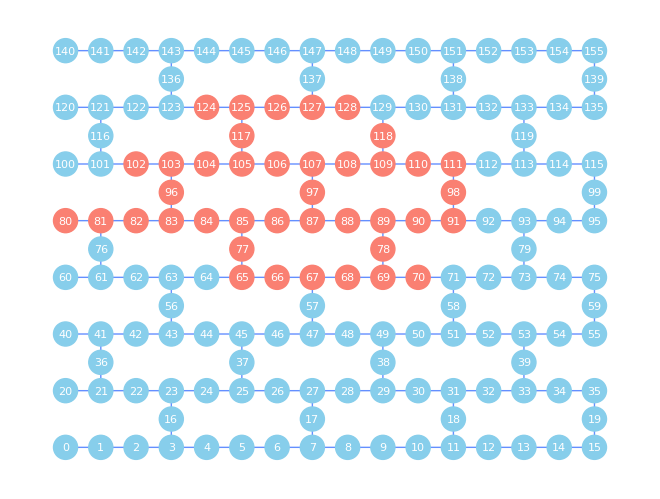

In [8]:
print(f'Chain for {backend_name}: {backend.configuration().coupling_map}')
qcolors = ['salmon' if i in layout else 'skyblue' for i in range(0, backend.configuration().n_qubits)]
plot_gate_map(backend, label_qubits=True, qubit_color=qcolors)


In [10]:
for circ in [qc1]:
    cz_depth = circ.depth(lambda instr: len(instr.qubits) == 2)
    gate_number = circ.count_ops()
    print("cz_depth", cz_depth, ", gate_number ", gate_number )

cz_depth 54 , gate_number  OrderedDict({'sx': 737, 'rz': 422, 'cz': 321, 'measure': 40, 'x': 37, 'barrier': 1})


ITE hardware test

In [11]:
if if_adsorting == 0:
    if_adsorting = False
else:
    if_adsorting = True
    invert = True

print("\n\n#############################################################################")

print("\nn_qubits:            ", n_qubits)
print("r:                   ", r)
print("alpha:               ", alpha)
print("tau:                 ", tau)
print("layer:               ", layer)

print("backend_method:      ", backend_method)
print("bond:                ", bond)
print("shots:               ", shots)

print("graph_density:       ", graph_type)
print("if_adsorting:        ", if_adsorting)
print("if_analytic:         ", if_analytic)

print('CHECK THE NUMBER OF SHOTS WITH THE TWIRLING IN CASE OF HARDWARE')

#make data dir
if if_analytic == 1:
    dir_0 = './data_iter_adap_sorting_analytic_mps_hardware/'
    
else:
    dir_0 = './data_iter_adap_sorting_nomeasure_mps_hardware/'
    

os.makedirs(dir_0, exist_ok=True)



#############################################################################

n_qubits:             40
r:                    14
alpha:                0.001
tau:                  0.3
layer:                1
backend_method:       hardware
bond:                 100
shots:                100000
graph_density:        3regular
if_adsorting:         True
if_analytic:          1
CHECK THE NUMBER OF SHOTS WITH THE TWIRLING IN CASE OF HARDWARE


In [12]:
# backend_name = "ibm_fez"
# service = QiskitRuntimeService(name="ite")
# backend = service.backend(backend_name)

# cloud_transpiler_service = TranspilerService(
#     backend_name=backend_name,
#     ai="auto",
#     optimization_level=3,
# )


In [12]:
#region load qubo instances, get Hamiltonian and edge_coeff_dict
instance_dir = '../instances/'+ graph + '/N_' + str(N)
with open(instance_dir + '/QUBO_' + str(N ) + 'V_'+ 'r_'+ str(r)+ '.gpickle', 'rb') as f:
    G = pickle.load(f)
coeff_list = np.loadtxt(instance_dir + '/QUBO_coeff_' + str(N) + 'V_'+ 'r_'+ str(r)+ '.txt')
h_list = coeff_list[:N ]
J_list = coeff_list[N :]

edge_list = list(itertools.chain.from_iterable(partition_graph(G)))


# Initialize dictionary for single Pauli Z term with coefficient from h_list
edge_coeff_dict = {}
edge_coeff_dict.update({(i,): h_val for i, h_val in enumerate(h_list)})
edge_coeff_dict.update({edge: J_val for edge, J_val in zip(edge_list, J_list)}) #CHANGED COMPARED TO THE OLD CODE
# print('edge_coeff_dict', edge_coeff_dict.items())

#endregion


if backend_method == 'matrix_product_state':
    backendoptions = {'method':backend_method, 'matrix_product_state_max_bond_dimension': bond, 'shots': shots}
else:
    backendoptions = {'method':backend_method, 'shots': shots}

with Session(backend=backend) as session: 

    #region get best sorting way from cvar value
    print("\n\n##start random order circuit")
    t1 = time.time()
    expz_array = np.array([0]*n_qubits)

    edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
    n_qubits, tau, layer, expz_array, edge_coeff_dict, edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic,  backend, session, cloud_transpiler_service)     #HO SPOSTATO IL SALVADATI A DOPO
    cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)
    t2 = time.time()

    print("time to run whole circuit: ", t2-t1)
    print('cvar of random order: ', cvar)
    # print("\nparams_init: ", params_init)
    print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
    print('expz_array: ', expz_array)

    ############################################################
    best_cvar = cvar 
    sorting = False
    best_abs = False
    best_inv = False

    print("\n\n##start adaptive sorting")
    if if_adsorting:
        for Abs in [True, False]:
            for invert in [True, False]:    

                print("\n\n##start random order circuit")
                t1 = time.time()    

                expz_array = np.array([0]*n_qubits)
                sorted_edge_list, edges_columns = sorted_gates(J_list, edge_list, Abs, invert)

                edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
                n_qubits, tau, layer, expz_array, edge_coeff_dict, sorted_edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic, backend, session, cloud_transpiler_service)     #HO SPOSTATO IL SALVADATI A DOPO
                cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)
                
                t2 = time.time()
                print("time to run whole circuit sorted: ", t2-t1)

                print(f'\nAbs:{Abs}, invert:{invert}, cvar: {cvar}')
                # print("\nparams_init: ", params_init)
                print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
                # print('expz_array: ', expz_array)


                if cvar < best_cvar:
                    best_cvar = cvar
                    sorting = True
                    best_abs = Abs
                    best_inv = invert
            
    #endregion


    #region iterate and save data
    print('\n\n#############################################################################')
    print('start iterate')
    if sorting:
        edge_list, edges_columns = sorted_gates(J_list, edge_list, best_abs, best_inv)
        print('\nchanged: ', sorting, best_abs, best_inv)

    expz_array = np.array([0]*n_qubits)
    steps_edge_params_dict = {}
    steps_exp_poss_dict = {}
    steps_cvar_dict = {}
    for step in range(10):

        # circ_init = initial_state_ry(n_qubits, expz_array)
        edge_params_dict, params_init, exp_poss_dict = MimicITE_iterate(\
        n_qubits, tau, layer, expz_array, edge_coeff_dict, edge_list, eigen_idvalue_dict, shots, backendoptions, if_analytic, backend, session, cloud_transpiler_service)     #HO SPOSTATO IL SALVADATI A DOPO
        cvar, expz_array = get_expz(n_qubits, exp_poss_dict['l_1'] , alpha)
        #entropy = entanglement_entropy(state_all , range(round(n_qubits/2)), [2]*n_qubits, tol=1e-12)[0]

        steps_edge_params_dict['step_'+str(step)] = edge_params_dict
        steps_exp_poss_dict['step_'+str(step)] = list(exp_poss_dict['l_1'].items())[:100]
        steps_cvar_dict['step_'+str(step)] = cvar
        print('\nstep: ', step)
        print(f"cvar: {cvar:.6f}")
        # print("\nparams_init: ", params_init)
        print('(exp, poss):', [(float(tp[0][0]), tp[1]) for tp in list(exp_poss_dict['l_1'].items())[:5]])
        print(f"expz_array: {expz_array}")
        print('(exp, poss):', sorted([(float(tp[0][0]), tp[1]) for tp in exp_poss_dict['l_1'].items()], key=lambda x: x[1], reverse=True)[:5], 'Highest p') # Change to False if you want ascending order
    
num_params = len(params_init)   

dir_name =  dir_0 + '/graph_{}/shots_{}/num_variables_{:03d}/params_{}_layer_{}/alpha_{}/r_{}/'\
    .format(graph_type,  shots, n_qubits, num_params, layer, alpha, r)
os.makedirs(dir_name, exist_ok=True)
    
gi_file_path = dir_name + 'ifadsorting_{}_tau_{}_bond_{}_hardware.pkl'.format(if_adsorting, tau, bond)

save_data = {
            'eigen_idvalue_dict': eigen_idvalue_dict,  ## from brute force or simulated annealing
            'edge_order': edge_list,
            'steps_edge_params_dict': steps_edge_params_dict,
            'steps_exp_poss_dict': steps_exp_poss_dict,
            'steps_cvar_dict': steps_cvar_dict,
            'sorting' : sorting,
            'abs' : best_abs,
            'invert' : best_inv
                }

with open(gi_file_path, 'wb') as f:
    pickle.dump(save_data, f)

print('Write sucessfully to ' + dir_name)



##start random order circuit
backend: hardware

 analytic part done, start hardware

 hardware done in sec: 68.98615789413452
time to run whole circuit:  73.34847950935364
cvar of random order:  -28.949739999999952
(exp, poss): [(-34.0158, 0), (-34.0084, 0), (-33.9626, 0), (-33.9552, 0), (-33.5154, 0)]
expz_array:  [-0.7   1.   -0.78  0.42 -0.2   0.46  0.12  0.98  0.1  -0.9   0.88  0.78
  0.18 -0.2  -0.86  0.98  0.98 -0.52  0.86 -0.02  0.06  0.88 -0.14 -0.4
 -0.4  -0.48 -0.72 -1.    0.62 -1.    0.86  0.7  -0.46 -0.72  0.46 -0.72
 -0.8  -1.   -0.9  -0.08]


##start adaptive sorting


##start random order circuit
backend: hardware

 analytic part done, start hardware

 hardware done in sec: 71.46039986610413
time to run whole circuit sorted:  75.18042492866516

Abs:True, invert:True, cvar: -28.86429399999995
(exp, poss): [(-34.0158, 0), (-34.0084, 0), (-33.9626, 0), (-33.9552, 0), (-33.5154, 0)]


##start random order circuit
backend: hardware

 analytic part done, start hardware

 har

In [14]:
# job_id = 'cztebkerxz8g008ebp30'

# job = service.job(job_id)  # Fetch the job object using the job ID
# job.cancel()

# List all jobs
jobs = service.jobs()

# Print job IDs
for job in jobs:
    print(f"Job ID: {job.job_id()}, Status: {job.status()}, Backend: {job.backend().name}")
    print("Error message (if any):", job.error_message())


Job ID: czvw5fnkzhn0008cvqj0, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw4zknhqag008tbm9g, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw4b16rr3g008m2md0, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw3v7kzhn0008cvq4g, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw3b56rr3g008m2m80, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw2tkqnmvg008vpfwg, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw2ahqnmvg008vpfkg, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw1t76rr3g008m2kz0, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw1b5rxz8g008erwyg, Status: DONE, Backend: ibm_fez
Error message (if any): None
Job ID: czvw0tvkzhn0008cvp3g, Status: DONE, Backend: ibm_fez
Error message (if any): None


In [15]:
# from qiskit import QuantumCircuit
# from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

# # Create empty circuit
# example_circuit = QuantumCircuit(2)
# example_circuit.measure_all()
 
# # You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
# service = QiskitRuntimeService(name="ite")
# backend = service.least_busy(operational=True, simulator=False)
# print(backend)
# sampler = Sampler(backend)
# job = sampler.run([example_circuit])
# print(f"job id: {job.job_id()}")
# result = job.result()
# print(result)

In [16]:
# from collections import Counter

# # Extract the measurement data from the result
# bitarray = result[0].data.meas  # Get the BitArray
# # Inspect the structure of the BitArray
# print("BitArray structure:", bitarray)
# print("Shape of the BitArray:", bitarray.shape)

# # If bitarray is a 1D array of bits, convert directly to a list of bitstrings
# if len(bitarray.shape) == 1:  # This suggests a 1D array
#     bitstrings = [str(bit) for bit in bitarray]
# else:
#     # Assuming it's a 2D array, convert each row to a bitstring
#     bitstrings = [''.join(str(bit) for bit in bits) for bits in bitarray]

# # Count the occurrences of each bitstring (measurement outcome)
# from collections import Counter
# counts = dict(Counter(bitstrings))

# # Now you have the counts dictionary
# print(counts)
# counts = result[0].data.meas.get_counts()
# for bitstr, count in counts.items():
#     # print('\ncount', count)
#     # print('\nbistr', bitstr)
#     id = int(bitstr, 2)   ## q_{N-1}..... q1 q0, in mps backend
#     print(id)
#     print(bitstr)


3regular 10000 040 160 1 0.01 True 0.3 100

 backend mps
success: 1.0 > 0.01
[0, 0, 0.0043, 0.4203, 1.0]
[0.8561588438313962, 0.9773460568324136, 0.9998759988005573, 1.0, 1.0]
[-29.122928000000005, -33.24520800000001, -34.011582, -34.0158, -34.0158]

 backend fez
no success: 0.0001 < 0.01
[0, 0, 0, 0, 0.0001]
[0.752184808236173, 0.8642390888939849, 0.9242320921454151, 0.979203370198555, 0.9604456752450332]
[-25.58616800000001, -29.397784000000012, -31.43849400000001, -33.308386000000006, -32.670328]
3regular 100000 040 160 1 0.001 True 0.3 100

 backend mps
no success: 0 < 0.001
[0, 0, 0, 0, 0]
[0.68407980997066, 0.7700179916391781, 0.7771707853409284, 0.7330995008202057, 0.7508617172020049]
[-23.269521999999974, -26.19277799999995, -26.436085999999953, -24.936965999999952, -25.541161999999957]

 backend fez
success: 0.02256 > 0.001
[0, 2e-05, 0.00011, 0.00048, 0.02256]
[0.8156026317182004, 0.9755454818055137, 0.9975532546640093, 0.9998868760987542, 1.0]
[-27.74337599999996, -33.183959

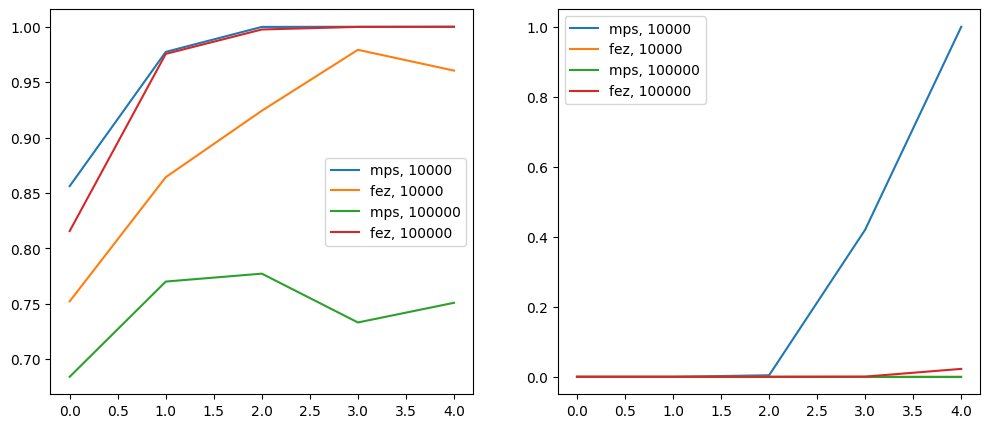

In [17]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for shots, alpha in [(10000, 0.01),(100000, 0.001)]:
    print(graph,  shots, num_variables, num_params, layer, alpha, if_adsorting,tau,bond)

    dir_0 = './data_iter_adap_sorting_analytic_mps_hardware' + '/graph_{}/shots_{}'\
            .format(graph,  shots) 

    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                .format(num_variables, num_params, layer, alpha)

    file_dir_name = dir_name + '/r_{}'\
                .format(r)

    for hardware in ['mps','fez']:

        if hardware == 'mps':
            print('\n backend', hardware)

            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                    .format(if_adsorting,tau,bond)
            with open(filename, 'rb') as f:
                data = pickle.load(f)
        
        else:
            print('\n backend', hardware)

            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}_hardware.pkl'\
                                                    .format(if_adsorting,tau,bond)
            with open(filename, 'rb') as f:
                data = pickle.load(f)

        steps_exp_poss_dict = data["steps_exp_poss_dict"]
        steps_cvar_dict = data["steps_cvar_dict"]

        fidelities = []
        cvars = [] 
        ars = []
        for passo in np.arange(5): 
            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]
            fidelity = poss_list[0]
            fidelities.append(fidelity)

            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
            cvar = steps_cvar_dict[f"step_{passo}"]
            ar = cvar/exp_opt
            cvars.append(float(cvar))
            ars.append(float(ar))

        if fidelity > alpha:
            print('success:' , fidelity, '>' , alpha)
        else:
            print('no success:' , fidelity, '<' , alpha)

        print(fidelities)
        print(ars)
        print(cvars)
    
        ax1.plot(np.arange(5), ars, label = f'{hardware}, {shots}')
        ax2.plot(np.arange(5), fidelities, label = f'{hardware}, {shots}')
        ax1.legend()
        ax2.legend()





3regular 10000 040 160 1 0.01 True 0.3 100

 backend mps
success: 1.0 > 0.01
[0, 0, 0.0043, 0.4203, 1.0]
[0.8561588438313962, 0.9773460568324136, 0.9998759988005573, 1.0, 1.0]
[-29.122928000000005, -33.24520800000001, -34.011582, -34.0158, -34.0158]

 backend fez
no success: 0.0001 < 0.01
[0, 0, 0, 0, 0.0001]
[0.752184808236173, 0.8642390888939849, 0.9242320921454151, 0.979203370198555, 0.9604456752450332]
[-25.58616800000001, -29.397784000000012, -31.43849400000001, -33.308386000000006, -32.670328]
3regular 100000 040 160 1 0.001 True 0.3 100

 backend mps
no success: 0 < 0.001
[0, 0, 0, 0, 0]
[0.68407980997066, 0.7700179916391781, 0.7771707853409284, 0.7330995008202057, 0.7508617172020049]
[-23.269521999999974, -26.19277799999995, -26.436085999999953, -24.936965999999952, -25.541161999999957]

 backend fez
success: 0.02256 > 0.001
[0, 2e-05, 0.00011, 0.00048, 0.02256]
[0.8156026317182004, 0.9755454818055137, 0.9975532546640093, 0.9998868760987542, 1.0]
[-27.74337599999996, -33.183959

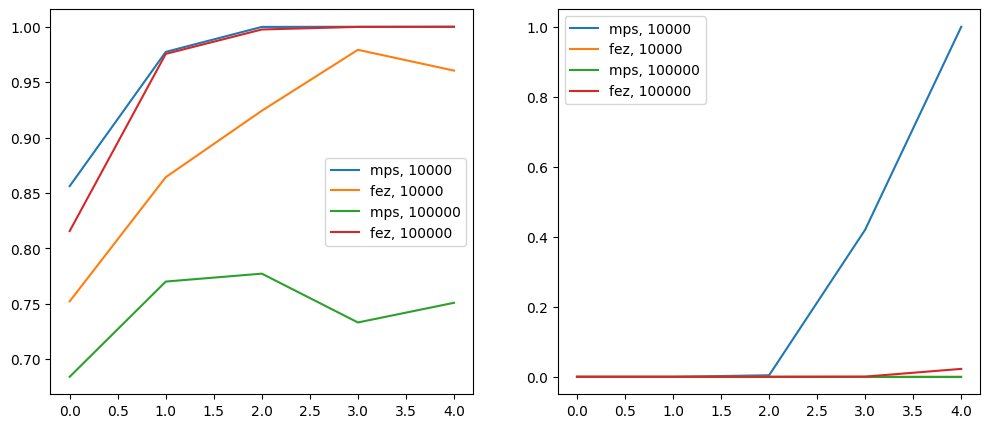

In [18]:
f = plt.figure(figsize=(12, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

for shots, alpha in [(10000, 0.01),(100000, 0.001)]:
    print(graph,  shots, num_variables, num_params, layer, alpha, if_adsorting,tau,bond)

    dir_0 = './data_iter_adap_sorting_analytic_mps_hardware' + '/graph_{}/shots_{}'\
            .format(graph,  shots) 

    dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
                .format(num_variables, num_params, layer, alpha)

    file_dir_name = dir_name + '/r_{}'\
                .format(r)

    for hardware in ['mps','fez']:

        if hardware == 'mps':
            print('\n backend', hardware)

            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}.pkl'\
                                                    .format(if_adsorting,tau,bond)
            with open(filename, 'rb') as f:
                data = pickle.load(f)
        
        else:
            print('\n backend', hardware)

            filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}_hardware.pkl'\
                                                    .format(if_adsorting,tau,bond)
            with open(filename, 'rb') as f:
                data = pickle.load(f)

        steps_exp_poss_dict = data["steps_exp_poss_dict"]
        steps_cvar_dict = data["steps_cvar_dict"]

        fidelities = []
        cvars = [] 
        ars = []
        for passo in np.arange(5): 
            poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]
            fidelity = poss_list[0]
            fidelities.append(fidelity)

            exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
            cvar = steps_cvar_dict[f"step_{passo}"]
            ar = cvar/exp_opt
            cvars.append(float(cvar))
            ars.append(float(ar))

        if fidelity > alpha:
            print('success:' , fidelity, '>' , alpha)
        else:
            print('no success:' , fidelity, '<' , alpha)

        print(fidelities)
        print(ars)
        print(cvars)
    
        ax1.plot(np.arange(5), ars, label = f'{hardware}, {shots}')
        ax2.plot(np.arange(5), fidelities, label = f'{hardware}, {shots}')
        ax1.legend()
        ax2.legend()


print('New hardware run')
dir_0 = './data_iter_adap_sorting_analytic_mps_hardware' + '/graph_{}/shots_{}'\
        .format(graph,  shots) 

dir_name =  dir_0 + '/num_variables_{}/params_{}_layer_{}/alpha_{}'\
            .format(num_variables, num_params, layer, alpha)

file_dir_name = dir_name + '/r_{}'\
            .format(r)

filename = file_dir_name + '/ifadsorting_{}_tau_{}_bond_{}_hardware_twirl.pkl'\
                                                .format(if_adsorting,tau,bond)
with open(filename, 'rb') as f:
    data = pickle.load(f)


steps_exp_poss_dict = data["steps_exp_poss_dict"]
steps_cvar_dict = data["steps_cvar_dict"]

fidelities = []
cvars = [] 
ars = []
for passo in np.arange(5): 
    poss_list = [item[1] for item in steps_exp_poss_dict[f'step_{passo}']]
    fidelity = poss_list[0]
    fidelities.append(fidelity)

    exp_opt = steps_exp_poss_dict[f'step_{passo}'][0][0][0]
    cvar = steps_cvar_dict[f"step_{passo}"]
    ar = cvar/exp_opt
    cvars.append(float(cvar))
    ars.append(float(ar))

if fidelity > alpha:
    print('success:' , fidelity, '>' , alpha)
else:
    print('no success:' , fidelity, '<' , alpha)

print(fidelities)
print(ars)
print(cvars)